Exercise 1: 
I found the difficult and had no one to work with.

Exercise 2: making your own data and exploring scikit-learn


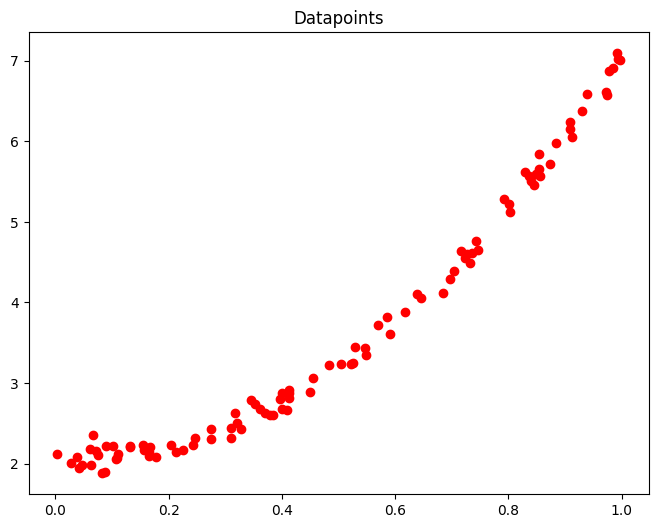

In [4]:
import numpy as np
import matplotlib.pyplot as plt
x = np.random.rand(100,1)
y = 2.0+5*x*x+0.1*np.random.randn(100,1)

plt.figure(figsize = (8, 6))
plt.title('Datapoints')
plt.plot(x, y, 'ro')
plt.show()

1. Write your own code for computing the parametrization of the data set fitting a second-order polynomial.

In [6]:
def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)

def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

In [7]:
x = x.reshape(100)
y = y.reshape(100)

# design matrix as a function of second order polynomial
X = np.zeros((len(x),3))
X[:,0] = 1.0
X[:,1] = x
X[:,2] = x**2

beta = np.linalg.inv(X.T @ X) @ X.T @ y
ytilde = X @ beta # prediction
print(f'R2: {R2(y, ytilde)}')
print(f'MSE: {MSE(y, ytilde)}')

R2: 0.9959609934757732
MSE: 0.010370635382295865


2. Use thereafter scikit-learn (see again the examples in the slides for week 35) and compare with your own code. Note here that scikit-learn does not include, by default, the intercept. See the discussions on scaling your data in the slides for this week. This type of problems appear in particular if we fit a polynomial with an intercept.

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

x = x.reshape(-1, 1)

n = 50 # number of points
maxdegree = 3 # polynomial degree
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)


model = make_pipeline(PolynomialFeatures(degree=maxdegree), LinearRegression(fit_intercept=False))
clf = model.fit(x_scaled, y)
y_fit = clf.predict(x_scaled)

print(f'R2: {R2(y, y_fit)}')
print(f'MSE: {MSE(y, y_fit)}')


R2: 0.9959678654354078
MSE: 0.010352990798830787


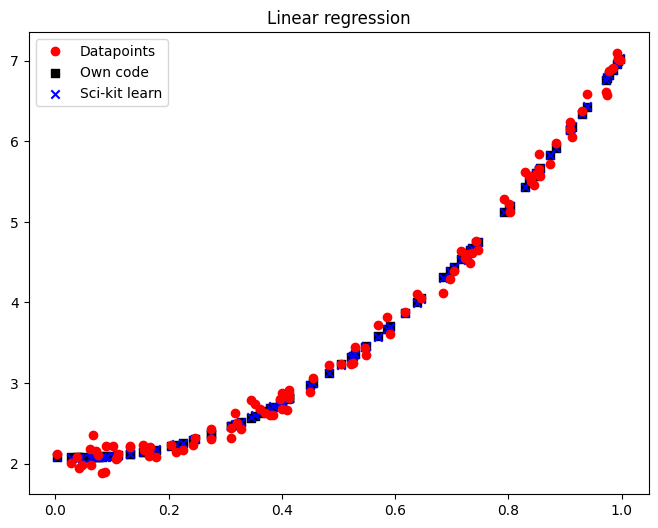

In [16]:
plt.figure(figsize = (8, 6))
plt.plot(x, y, 'ro', label = 'Datapoints')
plt.scatter(x, ytilde, color = 'black', marker = 's', label = 'Own code')
plt.scatter(x, y_fit, color = 'blue', marker = 'x', label = 'Sci-kit learn')
plt.title('Linear regression')
plt.legend()
plt.show()

Exercise 3: Split data in test and training data

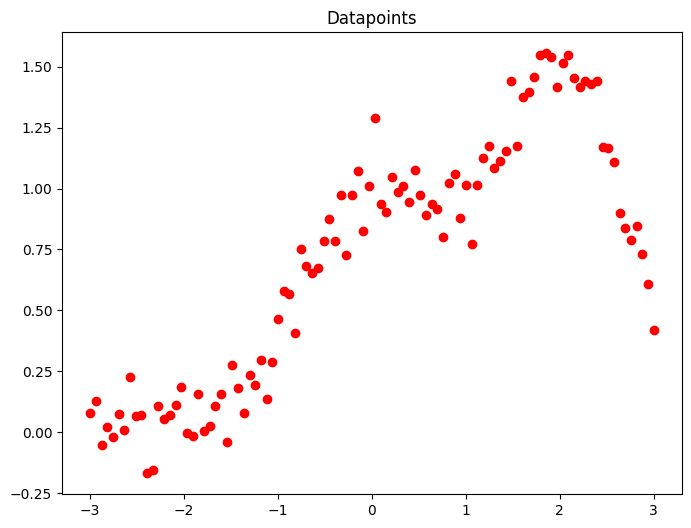

In [27]:
from sklearn.model_selection import train_test_split
np.random.seed()
n = 100
# Make data set.
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)

plt.figure(figsize = (8, 6))
plt.plot(x, y, 'ro')
plt.title('Datapoints')
plt.show()


a) Write a first code which sets up a design matrix 
 defined by a fifth-order polynomial and split your data set in training and test data.

In [21]:
maxdegree = 6
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

b) Write thereafter (using either scikit-learn or your matrix inversion code using for example numpy) and perform an ordinary least squares fitting and compute the mean squared error for the training data and the test data. These calculations should apply to a model given by a fifth-order polynomial. If you compare your own code with scikit_learn, not that the latter does not include by default the intercept. See the discussions on scaling your data in the slides for this week.

In [35]:
model = make_pipeline(PolynomialFeatures(degree=maxdegree), LinearRegression(fit_intercept=False))
clf = model.fit(x_train_scaled,y_train)
y_fit = clf.predict(x_train_scaled)
y_pred = clf.predict(x_test_scaled) 

print(f'R2 (train): {R2(y_train, y_fit)}')
print(f'R2 (test): {R2(y_test, y_pred)}')
print(f'MSE (train): {MSE(y_train, y_fit)}')
print(f'MSE (test): {MSE(y_test, y_pred)}')


R2 (train): 0.964946001721378
R2 (test): 0.9637137057821483
MSE (train): 0.009328224890772377
MSE (test): 0.009522000690431796


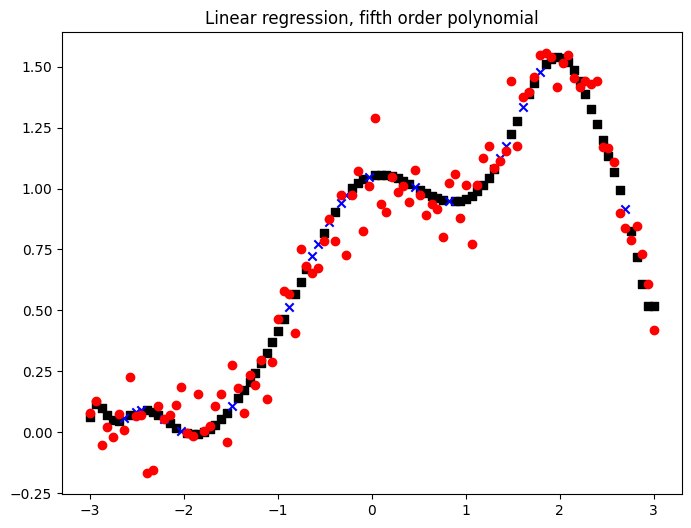

In [36]:
plt.figure(figsize = (8, 6))
plt.plot(x, y, 'ro')
plt.scatter(x_train, y_fit, color = 'black', marker = 's', label = 'Train')
plt.scatter(x_test, y_pred, color = 'blue', marker = 'x', label = 'Test')
plt.title('Linear regression, fifth order polynomial')
plt.show()

c) Add now a model which allows you to make polynomials up to degree 
. Perform a standard OLS fitting of the training data and compute the MSE for the training and test data and plot both test and training data MSE as functions of the polynomial degree. Compare what you see with Figure 2.11 of Hastie et al. Comment your results. For which polynomial degree do you find an optimal MSE (smallest value)?

In [39]:
maxdegree = 16
model = make_pipeline(PolynomialFeatures(degree=maxdegree), LinearRegression(fit_intercept=False))
clf = model.fit(x_train_scaled,y_train)
y_fit = clf.predict(x_train_scaled)
y_pred = clf.predict(x_test_scaled) 

print(f'R2 (train): {R2(y_train, y_fit)}')
print(f'R2 (test): {R2(y_test, y_pred)}')
print(f'MSE (train): {MSE(y_train, y_fit)}')
print(f'MSE (test): {MSE(y_test, y_pred)}')

R2 (train): 0.965078131047763
R2 (test): 0.9631330369786293
MSE (train): 0.009293063935340457
MSE (test): 0.009674375819036128


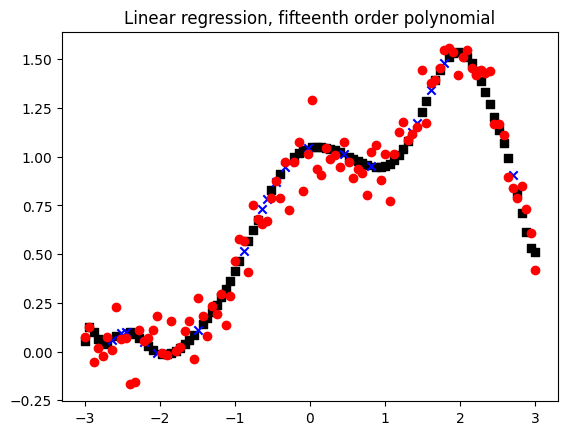

In [40]:
plt.plot(x, y, 'ro')
plt.scatter(x_train, y_fit, color = 'black', marker = 's', label = 'Train')
plt.scatter(x_test, y_pred, color = 'blue', marker = 'x', label = 'Test')
plt.title('Linear regression, fifteenth order polynomial')
plt.show()

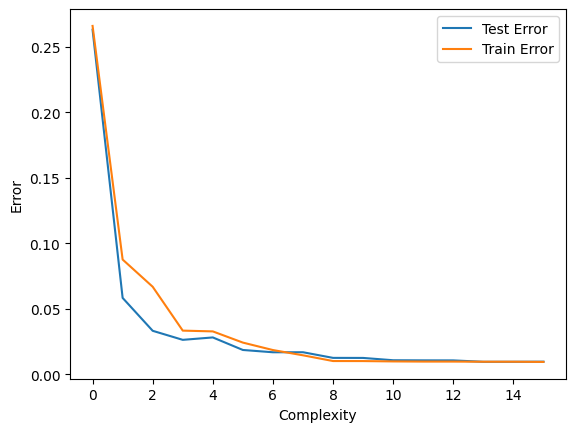

In [41]:
TestError = np.zeros(maxdegree)
TrainError = np.zeros(maxdegree)
polydegree = np.zeros(maxdegree)

for degree in range(maxdegree):
    model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression(fit_intercept=False))
    clf = model.fit(x_train_scaled,y_train)
    y_fit = clf.predict(x_train_scaled)
    y_pred = clf.predict(x_test_scaled) 
    polydegree[degree] = degree
    TestError[degree] = np.mean( np.mean((y_test - y_pred)**2) )
    TrainError[degree] = np.mean( np.mean((y_train - y_fit)**2) )

plt.plot(polydegree, TestError, label='Test Error')
plt.plot(polydegree, TrainError, label='Train Error')
plt.xlabel('Complexity')
plt.ylabel('Error')
plt.legend()
plt.show()

Figure 2.11 of Hastie et al. compares the computed MSE for the training and test data. As the complexity increases, the error decreases. At some point in the middle of their complexity range the error increases again, thus suggesting overfitting. In our data that occurs at a polynomial degree of around 5. The optimal MSE is found at polynomial degree 5.

In [ ]:
fjfjj